<a href="https://colab.research.google.com/github/raulc27/python_testes/blob/master/PMFWEEKJANFEV2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install matplotlib==3.1.3
!pip install cvxpy
!pip install pybind11
!pip install riskfolio-lib
!pip install fpdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
riskfolio-lib 4.0.3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pu

In [2]:
# importacao das bibliotecas
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import riskfolio as rp
#import riskfolio.Portfolio as pf
from fpdf import FPDF
warnings.filterwarnings('ignore')

In [3]:
#In sample

# periodo
inicio = '2016-01-01'
fim = '2022-08-30'

#Seleção dos ativos da carteira
ativos = ['PETR4.SA','VALE3.SA','BBDC4.SA','ITSA4.SA','ABEV3.SA','WEGE3.SA','IVVB11.SA']

#peSO da carteira anteriormente

peso_in = np.array([0.15,0.15,0.15,0.15,0.15,0.15,0.15])
peso_in

array([0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15])

In [4]:
#download dos dados
carteira = yf.download(ativos, start=inicio, end=fim)['Adj Close']
carteira.head()

[*********************100%***********************]  7 of 7 completed


,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2016-01-04 00:00:00-02:00,13.508918,6.386365,3.078626,83.110001,3.027317,8.419852,5.020995
2016-01-05 00:00:00-02:00,13.720855,6.409578,3.129937,83.000000,2.943592,8.307058,5.264499
2016-01-06 00:00:00-02:00,13.587412,6.318730,3.157925,82.099998,2.820208,7.696635,5.144460
2016-01-07 00:00:00-02:00,13.226339,6.190876,3.111278,81.000000,2.758516,7.238819,4.996988
2016-01-08 00:00:00-02:00,13.399025,6.069748,3.111278,80.000000,2.762922,6.993322,4.972979


In [5]:
#Extração dos parâmetros

#Retornos
retorno_carteira = carteira.pct_change().dropna()

#Covariancia
cov_in = retorno_carteira.cov()

In [6]:
cov_in

,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
ABEV3.SA,0.000321,0.000194,0.000167,0.000016,0.000209,0.000111,0.000157
BBDC4.SA,0.000194,0.000534,0.000380,0.000043,0.000448,0.000254,0.000189
ITSA4.SA,0.000167,0.000380,0.000375,0.000038,0.000361,0.000191,0.000177
IVVB11.SA,0.000016,0.000043,0.000038,0.000881,0.000063,0.000066,0.000024
PETR4.SA,0.000209,0.000448,0.000361,0.000063,0.000975,0.000423,0.000254
VALE3.SA,0.000111,0.000254,0.000191,0.000066,0.000423,0.000828,0.000156
WEGE3.SA,0.000157,0.000189,0.000177,0.000024,0.000254,0.000156,0.000517


In [7]:
pesos_in = pd.DataFrame(data={'peso_in':peso_in}, index=ativos)
pesos_in

,peso_in
PETR4.SA,0.15
VALE3.SA,0.15
BBDC4.SA,0.15
ITSA4.SA,0.15
ABEV3.SA,0.15
WEGE3.SA,0.15
IVVB11.SA,0.15


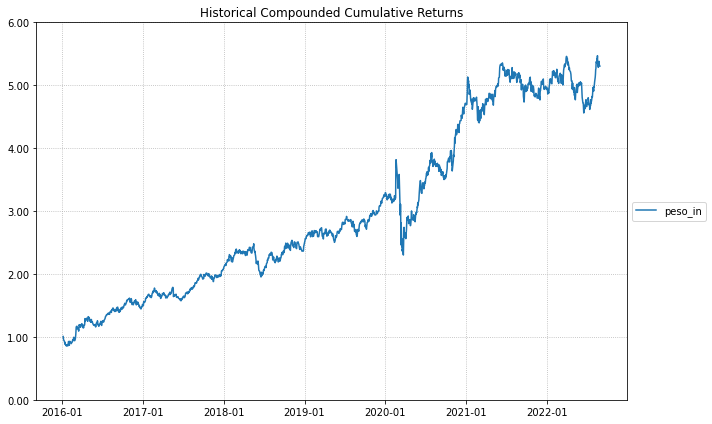

In [8]:
ax = rp.plot_series(returns=retorno_carteira, w=pesos_in, cmap='tab20', height=6, width=10, ax=None)

In [9]:
#parametros out-of-sample
out_inicio = '2022-09-01'
out_fim = '2023-01-20'

#download dos dados
carteira_out = yf.download(ativos, start=out_inicio, end=out_fim)['Adj Close']

#Calcular o retorno
retorno_out = carteira_out.pct_change().dropna()

#Matriz covariância
cov_out = retorno_out.cov()

[*********************100%***********************]  7 of 7 completed


In [10]:
retorno_out

,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2022-09-02 00:00:00-03:00,0.003240,0.010940,0.015284,-0.021020,-0.012703,-0.015182,0.064482
2022-09-05 00:00:00-03:00,0.004522,0.002072,0.011828,-0.002460,-0.002394,0.036554,0.022840
2022-09-06 00:00:00-03:00,0.000643,-0.006202,-0.017003,0.008969,-0.037193,-0.023766,-0.019741
2022-09-08 00:00:00-03:00,-0.003856,-0.005720,0.002162,0.020000,-0.009346,0.013193,-0.002641
2022-09-09 00:00:00-03:00,0.014194,0.013598,0.006473,0.003050,-0.000314,0.078127,0.007944
...,...,...,...,...,...,...,...
2023-01-13 00:00:00-03:00,-0.015603,-0.003324,-0.008046,0.002676,-0.002436,0.000853,0.011945
2023-01-16 00:00:00-03:00,-0.048991,-0.030687,-0.017381,0.014009,-0.021571,-0.016734,-0.032846
2023-01-17 00:00:00-03:00,0.050000,0.006882,0.015330,-0.013158,0.061564,-0.001301,0.016450


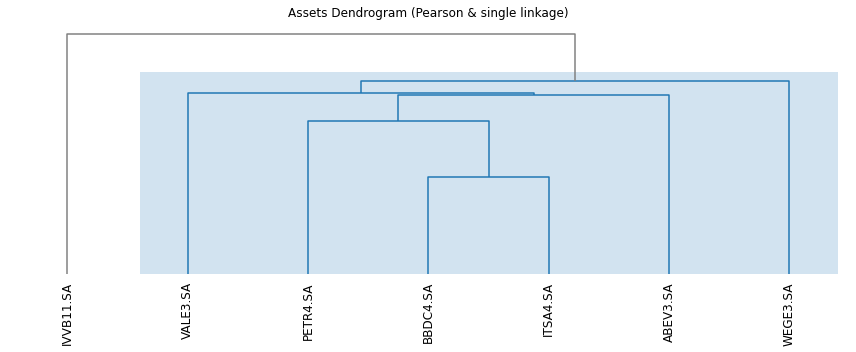

In [11]:
#Plotando Clusters

ax = rp.plot_dendrogram(returns=retorno_carteira,
                            codependence='pearson',
                            linkage='single',
                            k=None,
                            max_k=10,
                            leaf_order=True,
                            ax=None)

In [12]:
pd.options.display.float_format = '{:.4%}'.format

portfolio = rp.HCPortfolio(returns=retorno_carteira)

model = 'HRP'
codependence = 'pearson'
rm = 'MV'
rf = 0

linkage = 'single'
leaf_order = True

pesos = portfolio.optimization(model = model, 
                               codependence = codependence,
                               rm = rm,
                               rf = rf,
                               leaf_order=leaf_order)

display(pesos)

,weights
ABEV3.SA,22.8984%
BBDC4.SA,10.3000%
ITSA4.SA,14.6544%
IVVB11.SA,16.2134%
PETR4.SA,9.9759%
VALE3.SA,11.7466%
WEGE3.SA,14.2112%


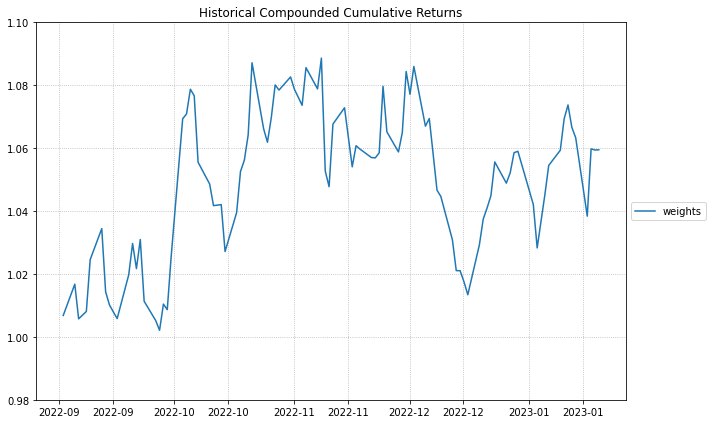

In [13]:
# Retorno Acumulado out of sample
fig_2, ax_2 = plt.subplots()
rp.plot_series(returns=retorno_out, w=pesos, cmap='tab20', height=6, width=10, ax=None)
plt.savefig('cum_ret.png')

## Gráficos de distribuição dos pesos

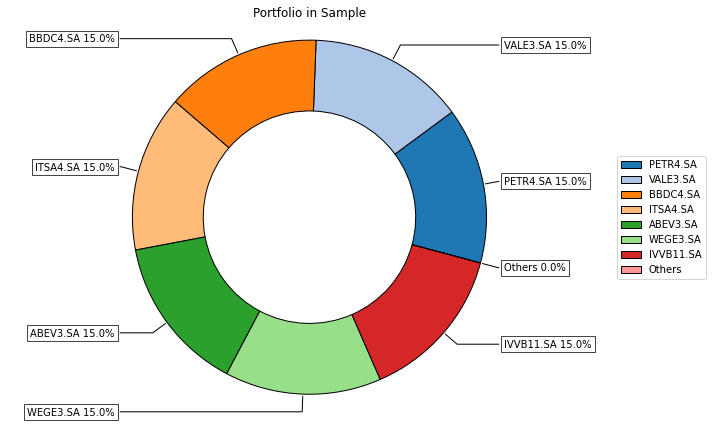

In [14]:
#Pesos in-sample
fig_3, ax_3 = plt.subplots()
rp.plot_pie(w=pesos_in,
            title='Portfolio in Sample',
            height=6,
            width=10,
            cmap='tab20',
            ax=None)
plt.savefig('pf_weights_in.png')

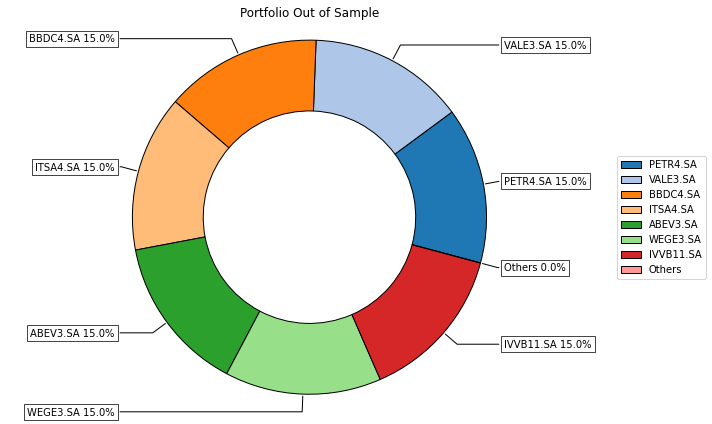

In [15]:
#Pesos out-of-sample
fig_4, ax_4 = plt.subplots()
rp.plot_pie(w=pesos_in,
            title='Portfolio Out of Sample',
            height=6,
            width=10,
            cmap='tab20',
            ax=None)
plt.savefig('pf_weights_out.png')

#Gráfico de distribuição dos pesos

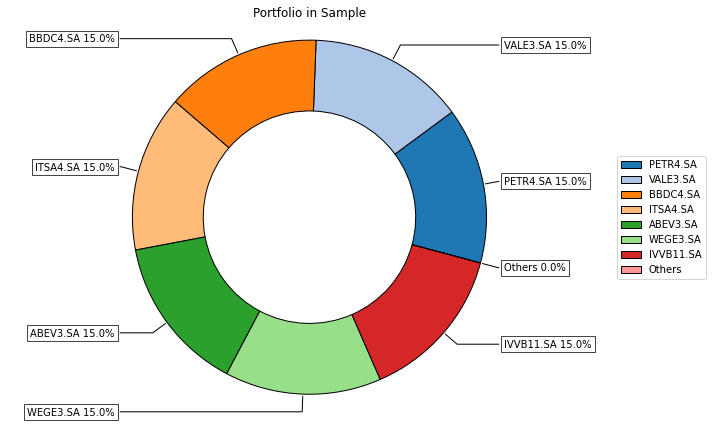

In [16]:
#Pesos in-sample

fig_3, ax_3 = plt.subplots()
rp.plot_pie(w=pesos_in, title='Portfolio in Sample', height=6, width=10, cmap='tab20', ax=None)
plt.savefig('pf_weights_in.png')

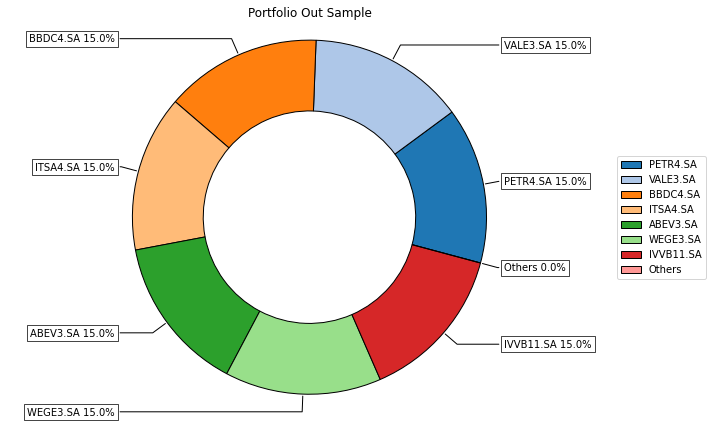

In [17]:
#Pesos out-sample

fig_4, ax_4 = plt.subplots()
rp.plot_pie(w=pesos_in, title='Portfolio Out Sample', height=6, width=10, cmap='tab20', ax=None)
plt.savefig('pf_weights_out.png')

# Contribuição de risco do ativo

In [18]:
# Parâmetros do portfolio otimizado

media_retorno = portfolio.mu
covariancia = portfolio.cov
retornos = portfolio.returns

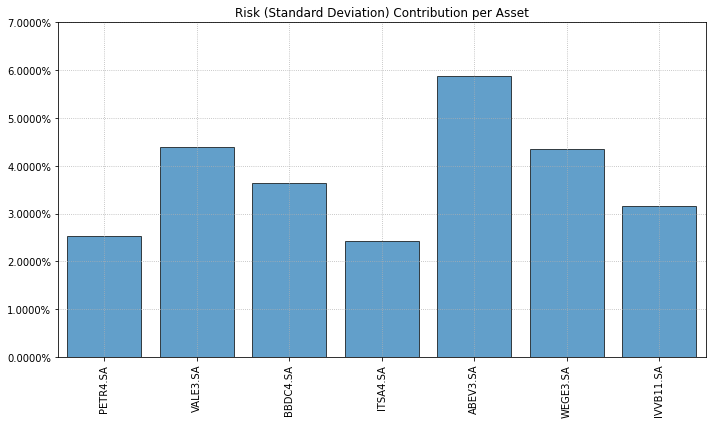

In [19]:
# in Sample
fig_5, ax_5 = plt.subplots()
rp.plot_risk_con(w=pesos_in, cov=cov_in, returns=retorno_carteira,
                 rm=rm,
                 alpha=0.5, color='tab:blue',
                 height=6,
                 width=10,
                 t_factor=252, ax=None)
plt.savefig('risk_cont_in.png')

In [20]:
cov_in

,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
ABEV3.SA,0.0321%,0.0194%,0.0167%,0.0016%,0.0209%,0.0111%,0.0157%
BBDC4.SA,0.0194%,0.0534%,0.0380%,0.0043%,0.0448%,0.0254%,0.0189%
ITSA4.SA,0.0167%,0.0380%,0.0375%,0.0038%,0.0361%,0.0191%,0.0177%
IVVB11.SA,0.0016%,0.0043%,0.0038%,0.0881%,0.0063%,0.0066%,0.0024%
PETR4.SA,0.0209%,0.0448%,0.0361%,0.0063%,0.0975%,0.0423%,0.0254%
VALE3.SA,0.0111%,0.0254%,0.0191%,0.0066%,0.0423%,0.0828%,0.0156%
WEGE3.SA,0.0157%,0.0189%,0.0177%,0.0024%,0.0254%,0.0156%,0.0517%


In [21]:
cov_out

,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
ABEV3.SA,0.0255%,0.0182%,0.0164%,-0.0066%,0.0170%,0.0069%,0.0146%
BBDC4.SA,0.0182%,0.0722%,0.0372%,-0.0120%,0.0299%,0.0137%,0.0170%
ITSA4.SA,0.0164%,0.0372%,0.0313%,-0.0129%,0.0252%,0.0068%,0.0193%
IVVB11.SA,-0.0066%,-0.0120%,-0.0129%,0.0303%,-0.0163%,0.0013%,-0.0101%
PETR4.SA,0.0170%,0.0299%,0.0252%,-0.0163%,0.0891%,0.0158%,0.0106%
VALE3.SA,0.0069%,0.0137%,0.0068%,0.0013%,0.0158%,0.0568%,0.0136%
WEGE3.SA,0.0146%,0.0170%,0.0193%,-0.0101%,0.0106%,0.0136%,0.0494%


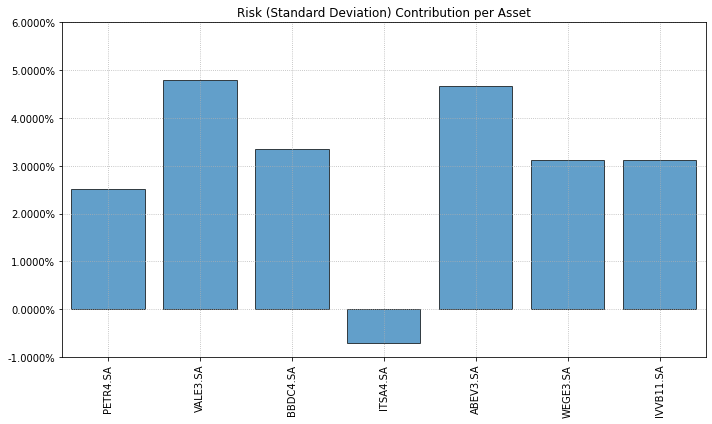

In [22]:
#Gráfico out of sample

fig_6, ax_6 = plt.subplots()

rp.plot_risk_con(w=pesos_in, cov=cov_out, returns=retorno_out,
                 rm=rm,
                 alpha=0.05, color='tab:blue',
                 height=6,
                 width=10,
                 t_factor=252, ax=None)

plt.savefig('risk_cont_out.png')

## Histograma de retornos do portfólio

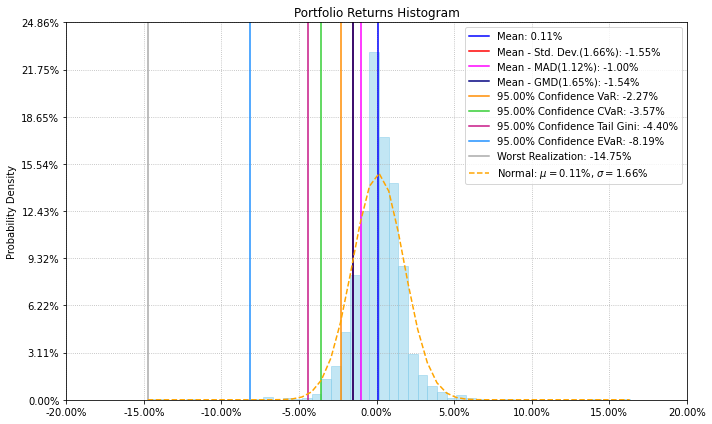

In [23]:
fig_7, ax_7 = plt.subplots()
rp.plot_hist(returns=retorno_carteira, w=pesos_in, alpha=0.05, height=6, width=10, ax=None)
plt.savefig('pf_returns_in.png')

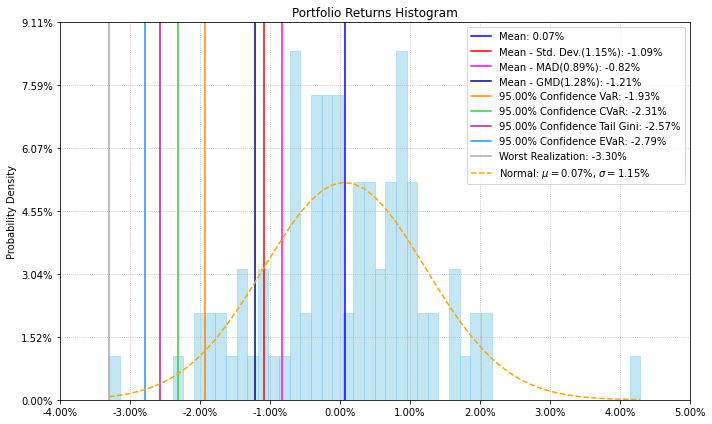

In [24]:
fig_8, ax_8 = plt.subplots()
rp.plot_hist(returns=retorno_out, w=pesos, alpha=0.05, bins=50,
             height=6, width=10, ax=None)

plt.savefig('pf_returns_out.png')

Tabela de medida de risco

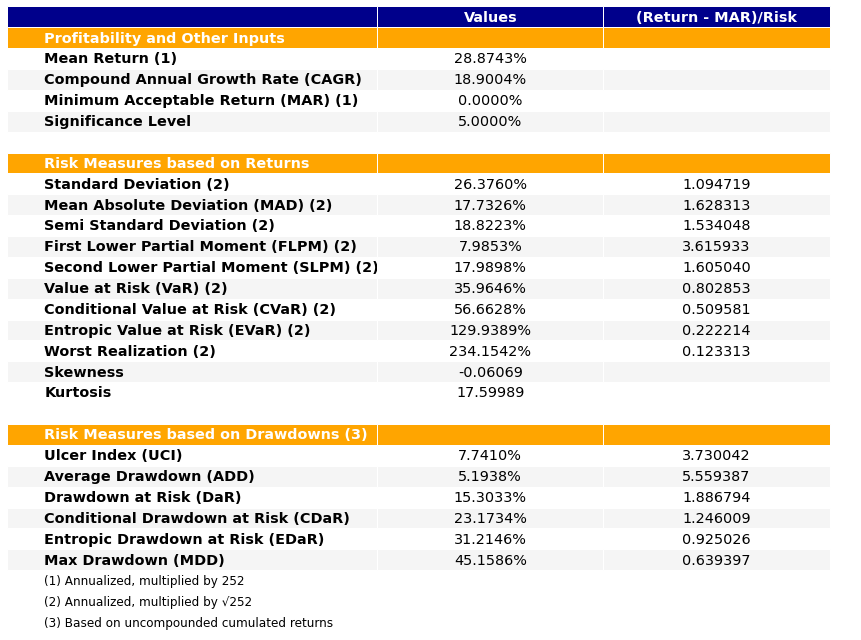

In [25]:
fig_9, ax_9 = plt.subplots()
rp.plot_table(returns=retorno_carteira, w=pesos_in, MAR=0, alpha=0.05, ax=None)

plt.savefig('table_in.png')

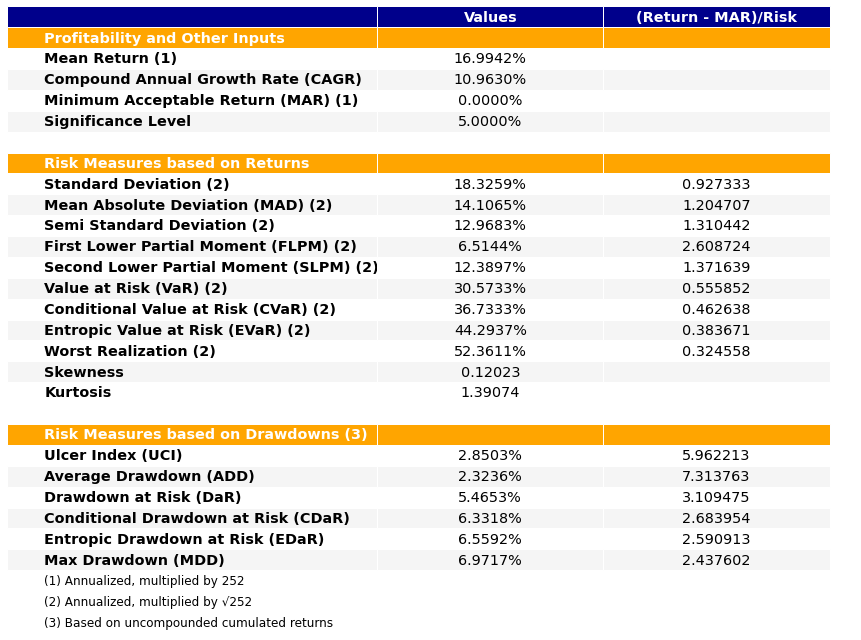

In [26]:
fig_10, ax_10 = plt.subplots()
rp.plot_table(returns=retorno_out, w=pesos, MAR=0, alpha=0.05, ax=None)

plt.savefig('table_out.png')

##Dia 3 -  Construindo relatorio PDF

In [38]:
# 1. Setup básico do PDF

# Criar o pdf

pdf = FPDF()

#Adiciona uma nova página
pdf.add_page()

#Setup da fonte
pdf.set_font('Arial', 'B', 16)

# 2. layout do pdf
pdf.cell(40,10, 'Diagnóstico da sua Carteira')

# Quebra de linha
pdf.ln(20)

# 3. Tabela performance
pdf.cell(20,7,'Como sua carteira performou de {} até {}'.format(inicio,fim))
pdf.ln(8)
pdf.image('table_in.png',w=180,h=200)
pdf.ln(60)

# 4. Tabela performance out-of-sample
pdf.cell(20,7,'Como sua carteira performou de {} até {}'.format(inicio,fim))
pdf.ln(8)
pdf.image('table_out.png',w=180,h=200)
pdf.ln(60)

# 5. Retorno acumulado Carteira
pdf.cell(20,7,'Como sua carteira performou de {} até {}'.format(inicio,fim))
pdf.ln(8)
pdf.image('cum_ret.png',w=120,h=70)
pdf.ln(10)

# 6. Pesos
pdf.cell(20,7,'Pesos Carteira Atual')
pdf.ln(8)
pdf.image('pf_weights_in.png',w=100,h=60)
pdf.ln(10)

pdf.cell(20,7,'Pesos Carteira Otimizada')
pdf.ln(8)
pdf.image('pf_weights_out.png',w=100,h=60)
pdf.ln(30)

# 7. Contribuição de risco por ativo

pdf.cell(20,7,'Contribuição de risco por ativo de {} até {}'.format(inicio,fim))
pdf.ln(8)
pdf.image('risk_cont_in.png',w=150,h=80)
pdf.ln(20)

pdf.cell(20,7,'Contribuição de risco por ativo de {} até {}'.format(inicio,fim))
pdf.ln(15)
pdf.image('risk_cont_out.png',w=150,h=80)
pdf.ln(80)

# 8. 
pdf.cell(20,7,'Histograma de retornos de {} até {}'.format(inicio,fim))
pdf.ln(15)
pdf.image('pf_returns_in.png',w=150,h=80)
pdf.ln(20)

# 9. Disclaimer
pdf.set_font('Times', '', 6)
pdf.cell(5, 2, 'Relatório construído com a biblioteca RiskFolio https://riskfolio-lib.readthedocs.io/en/latest')

# 10. output
pdf.output('diagnostico_de_carteira.pdf','F')

''